# Dense Neural Network - Tensor

## 1. Import data

In [41]:
# Disable warning
import numpy as np
print(np.__version__)
import pandas as pd

1.26.4


In [42]:
# Importing all datasets
df_smoke = pd.read_csv("smoke_detection_iot.csv")
df_smoke = df_smoke.drop(columns=["Unnamed: 0"])

## 2. Inspect DataFrame

In [43]:
df_smoke.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## 4. Test-Train Split

In [44]:
# Putting feature variable to X
X = df_smoke.drop(['UTC','Fire Alarm'], axis=1)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [45]:
# Putting response variable to y
y = df_smoke['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

#### Splitting

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

## 5. Train First Neural Network with TensorFlow

### Building Model 

In [47]:
import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

2.17.1
Epoch 1/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9285 - loss: 12.0565 - val_accuracy: 0.9600 - val_loss: 1.4088
Epoch 2/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9571 - loss: 0.9211 - val_accuracy: 0.9951 - val_loss: 0.0406
Epoch 3/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.2109 - val_accuracy: 0.9660 - val_loss: 0.0810
Epoch 4/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9794 - loss: 0.0872 - val_accuracy: 0.9836 - val_loss: 0.0511
Epoch 5/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9708 - loss: 0.0994 - val_accuracy: 0.9695 - val_loss: 0.1454
Epoch 6/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9696 - loss: 0.1019 - val_accuracy: 0.9584 - val_loss: 0.2128
Epoch 7/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9648 - loss: 0.1133 - val_accuracy: 0.9788 - val_loss: 0.0626
Epoch 8/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9714

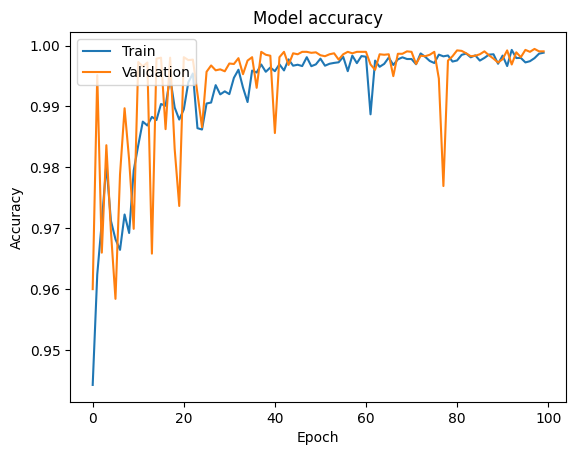

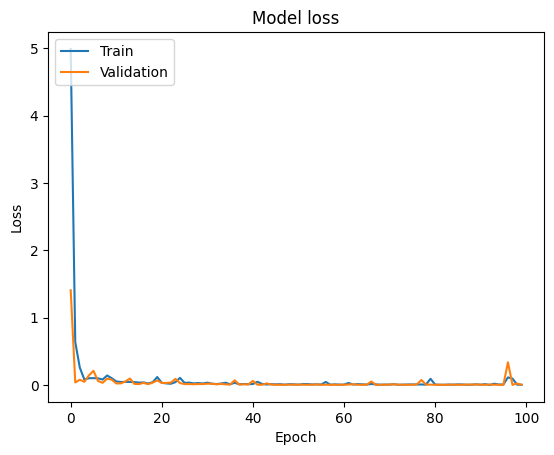

In [48]:
import matplotlib.pyplot as plt

def plot_over_fitting_validation(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plot_over_fitting_validation(history)

In [49]:
# Making predictions You can now use the predict() function to get prediction probabilities on the encoded test data:
predictions = model.predict(X_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


In [50]:
# Convert them to classes before evaluation
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [51]:
# Model evaluation on test data Let’s start with the confusion matrix:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[3574    6]
 [   6 8940]]


In [52]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')

Accuracy: 0.9990


## 6. Tunning Model with Hyperparameter Tuning, Regularization, Dropout, and Early Stopping

What to Look for in the Plots:
1. Training vs Validation Accuracy:
If the training accuracy keeps increasing while the validation accuracy starts to plateau or decrease, this is a clear sign of overfitting.
A significant gap between training accuracy and validation accuracy indicates that the model is fitting too well to the training data but not generalizing.
2. Training vs Validation Loss:
If the training loss continues to decrease but the validation loss starts to increase after a few epochs, this indicates that the model is starting to overfit. The model is getting better at fitting the training data but is starting to perform worse on unseen data.

### Adding another layer

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # adding another layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9159 - loss: 28.0751 - val_accuracy: 0.9598 - val_loss: 0.4631
Epoch 2/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9577 - loss: 0.3498 - val_accuracy: 0.9704 - val_loss: 0.1634
Epoch 3/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9635 - loss: 0.1456 - val_accuracy: 0.9327 - val_loss: 0.1682
Epoch 4/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9695 - loss: 0.0928 - val_accuracy: 0.9871 - val_loss: 0.0881
Epoch 5/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1180 - val_accuracy: 0.9289 - val_loss: 0.1251
Epoch 6/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9329 - loss: 0.1316 - val_accuracy: 0.9592 - val_loss: 0.0689
Epoch 7/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9268 - loss: 0.1914 - val_accuracy: 0.8479 - val_loss: 0.2713
Epoch 8/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8005 - loss: 

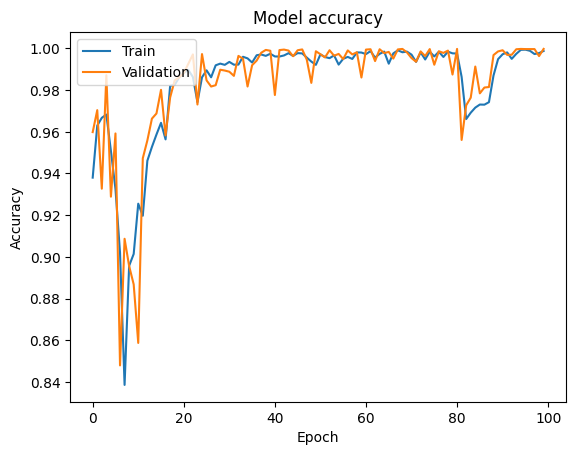

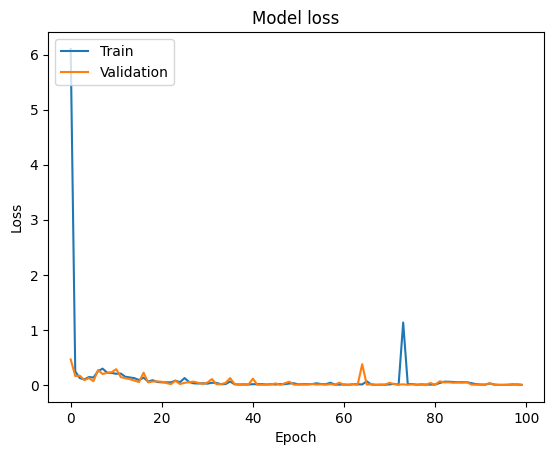

In [54]:
plot_over_fitting_validation(history)

### L1 Regularization

In [55]:
# L1 Regularization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

history_l1 = model_l1.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

Epoch 1/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9294 - loss: 15.2115 - val_accuracy: 0.9629 - val_loss: 2.2762
Epoch 2/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9634 - loss: 2.4351 - val_accuracy: 0.9501 - val_loss: 2.0074
Epoch 3/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 1.5232 - val_accuracy: 0.9919 - val_loss: 1.1464
Epoch 4/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 1.0238 - val_accuracy: 0.9895 - val_loss: 0.9713
Epoch 5/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.8777 - val_accuracy: 0.9875 - val_loss: 0.7471
Epoch 6/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.7136 - val_accuracy: 0.9384 - val_loss: 0.7894
Epoch 7/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.5682 - val_accuracy: 0.9915 - val_loss: 0.4051
Epoch 8/100
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9770 - loss: 

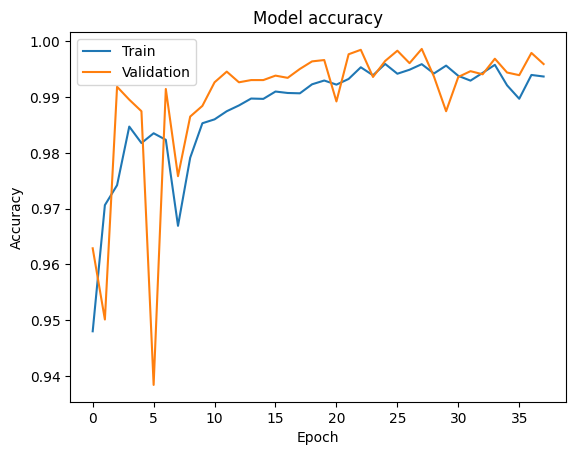

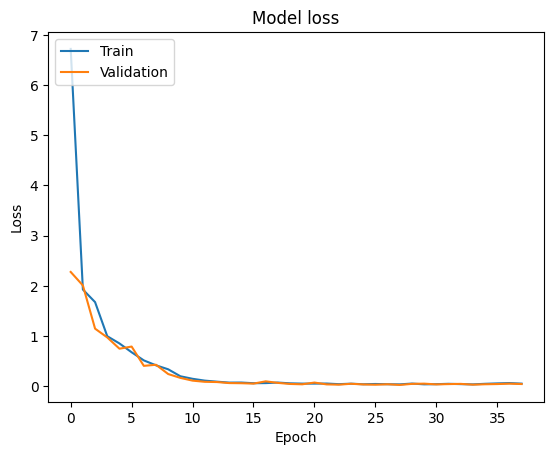

In [56]:
plot_over_fitting_validation(history_l1)

We can see that the model’s validation loss doesn’t start to increase, and it follows the training loss much more closely, which suggests that the model is less overfit than before.

### Making predictions on the final model

In [57]:
# Making predictions You can now use the predict() function to get prediction probabilities on the encoded test data:
predictions = model_l1.predict(X_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [58]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[3576    4]
 [  13 8933]]


In [60]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')

Accuracy: 0.9986


392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


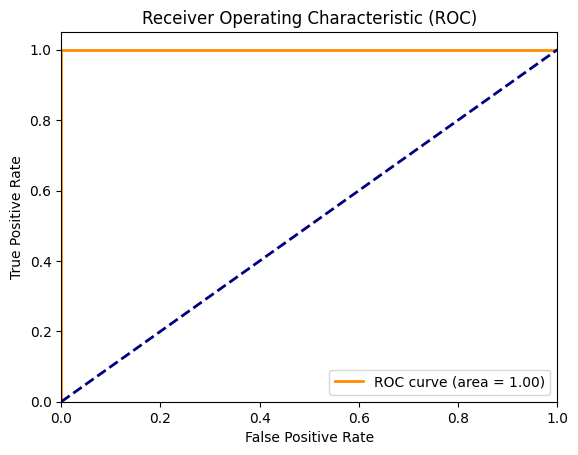

In [61]:
# Drawing the ROC curve for logistic regression using sklearn
def plot_roc_curve(X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    
    # Get the predicted probabilities (for the positive class)
    y_pred_prob = model.predict(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(X_test, y_test)

392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


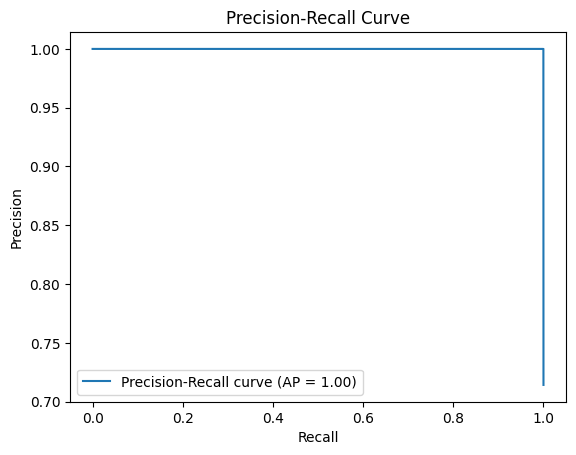

In [62]:
# Precision-Recall Curve
def plot_precision_recall_curve(X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, average_precision_score

    # Assuming y_test and y_pred_proba are defined
    # y_pred_proba is the predicted probabilities for the positive class (usually class 1)
    y_pred_prob = model.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)
    
    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()

plot_precision_recall_curve(X_test, y_test)